# Geomateric Bayesianism with Sparse Heuristics
*Last Updated: 2025-04-27 22:41:39 UTC*
*Author: standardgalactic*

## Framework Visualization

## Sparse Proxy Space Navigation with Null Bottlenecks and Markov Blankets

This diagram depicts the core dynamics of Geometric Bayesianism with Sparse Heuristics (GBSH). Cognitive states ($x_0$ to $x_4$) are modeled as nodes embedded within a curved proxy manifold $P$ (background ellipse), representing the structured space of possible transformations and interpretations. Sparse trajectories (blue arrows) connect states through minimal-energy paths, emphasizing GBSH's core principle of efficient navigation under resource constraints.

Critical to this structure are null bottlenecks ($\tau_1$, $\tau_2$), depicted as dark grey nodes. These represent localized constraint zones—regions where resource, time, or information bottlenecks force the proxy flow to narrow, enforcing decision points or inflection in the trajectory. These bottlenecks embody null convention logic, where the slowest process or tightest constraint sculpts the flow of cognition.

Surrounding key regions are Markov blankets ($\beta_1$, $\beta_2$), shown as soft, semi-permeable clusters (lavender/thistle regions). Markov blankets define dynamic informational boundaries: they filter incoming noise, stabilize local transformations, and protect coherent sub-trajectories from external perturbations.

Finally, external noise pressures (red arrows) represent environmental gradients—energy, signal, or uncertainty fields that press against the manifold, perturbing trajectory paths and forcing adaptive correction via sparse heuristic updating.

In this depiction, cognition is seen not as dense exhaustive computation but as a survival dance across a bent, noisy geometry, propagating minimal sparse paths through a world shaped by constraint, absence, and boundary emergence.

##  Mathematical Correspondence
Every element of this figure maps precisely to the GBSH mathematical formalism:

| Visual Element | Mathematical Entity | Explanation |
|----------------|-------------------|-------------|
| Proxy manifold $P$ (ellipse) | Manifold topology with metric $g_{ij}$ | Proxy space where cognitive states live; locally curved to represent constraint and affordance structure. |
| States $x_i$ (nodes) | Points $x_i \in P$ | Specific proxy states representing cognitive configurations or representational positions. |
| Sparse trajectory (blue arrows) | Minimal geodesic chains $x_i \to x_{i+1}$ with energy cost $E$ minimized | Bayesian heuristic search chooses sparse, minimal-deformation paths through $P$. Optimization principle: $\argmin(\Delta E + \lambda \Delta S)$. |
| Null bottlenecks $\tau_i$ (dark diamonds) | Local constraints $\tau_i$ that slow trajectory propagation (maximal delay $\tau = \max(\tau_i)$) | Null convention logic: flow is throttled at bottlenecks, forcing adaptation and choice compression. |
| Markov blankets $\beta_1, \beta_2$ (colored patches) | Dynamic boundary conditions $\partial\beta$ enclosing conditional independence | Interfaces where external perturbations are filtered; they govern which errors propagate inward and which are dampened. |
| Noise pressures (red arrows) | External perturbations $\partial P \to$ internal updates via sparse corrections | Noise drives deformation; cognition adapts sparsely to maintain trajectory within bounds while minimizing computational expense. |

##  Deep Structural Interpretation
You can think of a GBSH "trip" through cognition like this:

1. Start at an initial proxy state $x_0$.
2. Navigate toward goal states $(x_1, x_2, x_3, x_4)$ along sparse paths through $P$, chosen via Bayesian inference plus energetic cost heuristics.
3. Pause/Adapt at null bottlenecks ($\tau$) where tight resource constraints force slowdowns and deeper decision-making.
4. Stay coherent within Markov blankets ($\beta$), allowing local processing to occur relatively insulated from raw external noise.
5. Adjust trajectory based on incoming noise pressures, refining internal proxy representations while minimizing error propagation.

Mathematically, the overall principle is a constrained sparse optimization over the proxy manifold:

$$
\min_{\text{paths}} \int_P \left(E(\dot{x}(t)) + \lambda S(x(t))\right) dt
$$

subject to null constraints $\tau_i$, and boundary flows $\partial\beta$

where:
- $E$ = energetic cost (proxy deformation energy)
- $S$ = sparsity prior (favoring local, minimal shifts)
- $\lambda$ = tradeoff coefficient
- $\tau_i$ = bottleneck timing/energy thresholds
- $\partial\beta$ = Markov boundary dynamics

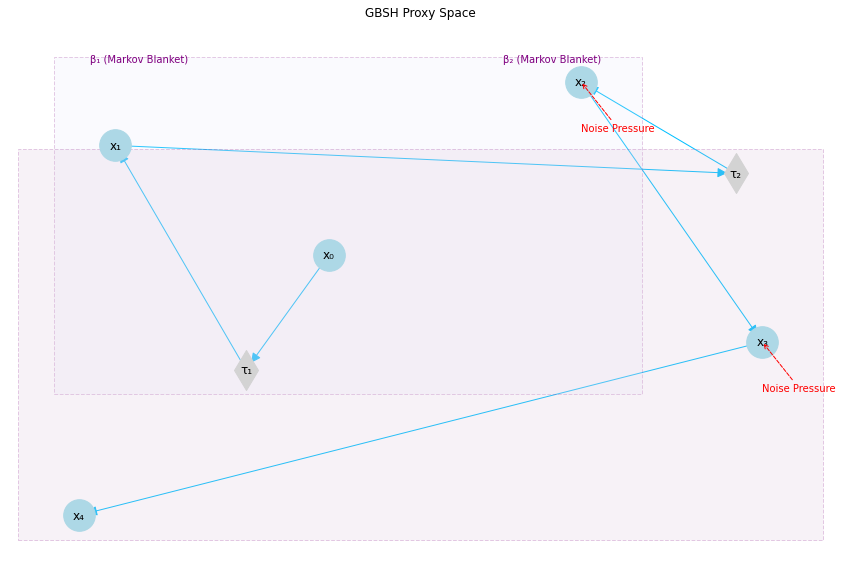

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches

# Create a new directed graph
G = nx.DiGraph()

# Add nodes
states = ['x₀', 'x₁', 'x₂', 'x₃', 'x₄']
taus = ['τ₁', 'τ₂']

# Add state nodes
for state in states:
    G.add_node(state, node_type='state')

# Add tau nodes
for tau in taus:
    G.add_node(tau, node_type='tau')

# Add edges
edges = [
    ('x₀', 'τ₁'),
    ('τ₁', 'x₁'),
    ('x₁', 'τ₂'),
    ('τ₂', 'x₂'),
    ('x₂', 'x₃'),
    ('x₃', 'x₄')
]

G.add_edges_from(edges)

# Create the plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw the main graph structure
nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n, attr in G.nodes(data=True) if attr['node_type'] == 'state'],
                      node_color='lightblue',
                      node_size=1000,
                      node_shape='o')

nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n, attr in G.nodes(data=True) if attr['node_type'] == 'tau'],
                      node_color='lightgrey',
                      node_size=800,
                      node_shape='d')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='deepskyblue', arrows=True, arrowsize=20)

# Add node labels
nx.draw_networkx_labels(G, pos)

# Add Markov blankets (clusters)
beta1_nodes = ['x₁', 'τ₁', 'x₂']
beta2_nodes = ['x₃', 'τ₂', 'x₄']

# Create patches for Markov blankets
def create_hull(nodes, color, alpha=0.2):
    node_positions = [pos[node] for node in nodes]
    x_coords = [p[0] for p in node_positions]
    y_coords = [p[1] for p in node_positions]
    
    # Create a polygon that encompasses the nodes
    hull_coords = [(min(x_coords)-0.1, min(y_coords)-0.1),
                  (max(x_coords)+0.1, min(y_coords)-0.1),
                  (max(x_coords)+0.1, max(y_coords)+0.1),
                  (min(x_coords)-0.1, max(y_coords)+0.1)]
    
    return patches.Polygon(hull_coords, closed=True, alpha=alpha, 
                         facecolor=color, edgecolor='purple', 
                         linestyle='--')

# Add Markov blankets
plt.gca().add_patch(create_hull(beta1_nodes, 'lavender'))
plt.gca().add_patch(create_hull(beta2_nodes, 'thistle'))

# Add noise pressure
noise_offset = 0.2
for node in ['x₂', 'x₃']:
    node_pos = pos[node]
    plt.annotate('Noise Pressure', 
                xy=(node_pos[0], node_pos[1]),
                xytext=(node_pos[0], node_pos[1] - noise_offset),
                color='red',
                arrowprops=dict(arrowstyle='->',
                              color='red',
                              linestyle='--'))

# Add titles for Markov blankets
plt.text(0.1, 0.95, 'β₁ (Markov Blanket)', color='purple', transform=plt.gca().transAxes)
plt.text(0.6, 0.95, 'β₂ (Markov Blanket)', color='purple', transform=plt.gca().transAxes)

plt.title('GBSH Proxy Space', pad=20)
plt.axis('off')
plt.tight_layout()

# To display in Jupyter notebook
plt.show()

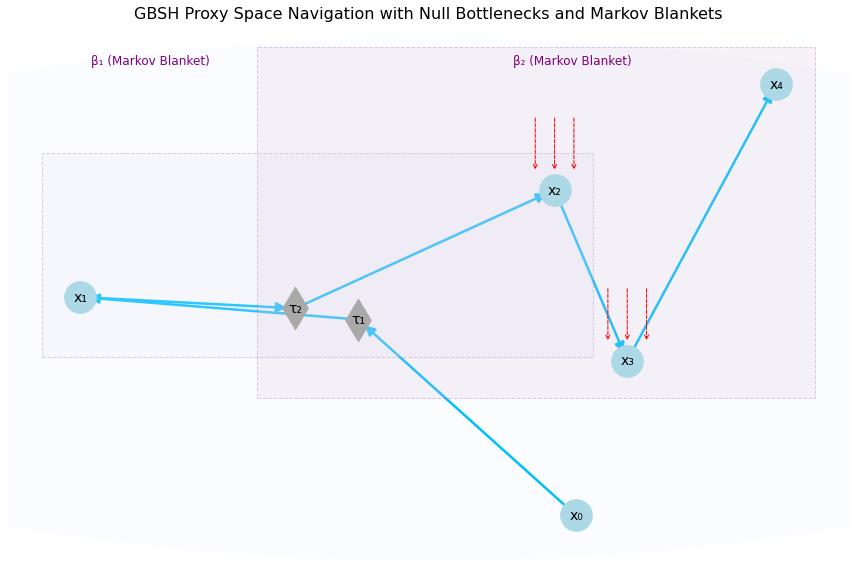

In [2]:
# GBSH Proxy Space Visualization (Polished Version)
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches
import numpy as np

# Create a new directed graph
G = nx.DiGraph()

# Add nodes
states = ['x₀', 'x₁', 'x₂', 'x₃', 'x₄']
taus = ['τ₁', 'τ₂']

# Add state nodes
for state in states:
    G.add_node(state, node_type='state')

# Add tau nodes (null bottlenecks)
for tau in taus:
    G.add_node(tau, node_type='tau')

# Add edges
edges = [
    ('x₀', 'τ₁'),
    ('τ₁', 'x₁'),
    ('x₁', 'τ₂'),
    ('τ₂', 'x₂'),
    ('x₂', 'x₃'),
    ('x₃', 'x₄')
]

G.add_edges_from(edges)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50)

# === Add manifold background ===
manifold = patches.Ellipse((0.5, 0.5), width=2.0, height=1.0, angle=0,
                           transform=ax.transAxes,
                           facecolor='aliceblue', edgecolor='none', alpha=0.3)
ax.add_patch(manifold)

# === Draw main graph structure ===
# States (light blue circles)
nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n, attr in G.nodes(data=True) if attr['node_type'] == 'state'],
                      node_color='lightblue',
                      node_size=1000,
                      node_shape='o')

# Tau nodes (dark grey diamonds)
nx.draw_networkx_nodes(G, pos,
                      nodelist=[n for n, attr in G.nodes(data=True) if attr['node_type'] == 'tau'],
                      node_color='darkgrey',
                      node_size=900,
                      node_shape='d')

# Sparse path edges (thicker, glowing)
nx.draw_networkx_edges(G, pos, 
                       edge_color='deepskyblue', 
                       arrows=True, 
                       arrowsize=20, 
                       width=2.5)

# Node labels
nx.draw_networkx_labels(G, pos, font_size=14)

# === Add Markov Blankets ===
# Define node groups
beta1_nodes = ['x₁', 'τ₁', 'x₂']
beta2_nodes = ['x₃', 'τ₂', 'x₄']

# Create convex hulls (approximation)
def create_hull(nodes, color, alpha=0.2):
    node_positions = [pos[node] for node in nodes]
    x_coords = [p[0] for p in node_positions]
    y_coords = [p[1] for p in node_positions]
    
    hull_coords = [(min(x_coords)-0.1, min(y_coords)-0.1),
                   (max(x_coords)+0.1, min(y_coords)-0.1),
                   (max(x_coords)+0.1, max(y_coords)+0.1),
                   (min(x_coords)-0.1, max(y_coords)+0.1)]
    
    return patches.Polygon(hull_coords, closed=True, alpha=alpha, 
                           facecolor=color, edgecolor='purple', linestyle='--')

# Add the blankets
ax.add_patch(create_hull(beta1_nodes, 'lavender'))
ax.add_patch(create_hull(beta2_nodes, 'thistle'))

# === Add Noise Pressure Arrows ===
noise_offset = 0.2
noise_nodes = ['x₂', 'x₃']
for node in noise_nodes:
    node_pos = pos[node]
    # Add multiple small arrows near each node
    for dx in [-0.05, 0, 0.05]:
        ax.annotate('',
            xy=(node_pos[0] + dx, node_pos[1] + 0.05),
            xytext=(node_pos[0] + dx, node_pos[1] + 0.2),
            arrowprops=dict(arrowstyle='->', color='red', linestyle='--'))

# === Add Blanket Titles ===
plt.text(0.1, 0.95, 'β₁ (Markov Blanket)', color='purple', transform=ax.transAxes, fontsize=12)
plt.text(0.6, 0.95, 'β₂ (Markov Blanket)', color='purple', transform=ax.transAxes, fontsize=12)

# Final plot settings
plt.title('GBSH Proxy Space Navigation with Null Bottlenecks and Markov Blankets', fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()

# === Save high-resolution outputs ===
plt.savefig('gbsh_proxy_space_final.svg', format='svg', dpi=300)
plt.savefig('gbsh_proxy_space_final.png', format='png', dpi=300)

# Display the figure
plt.show()


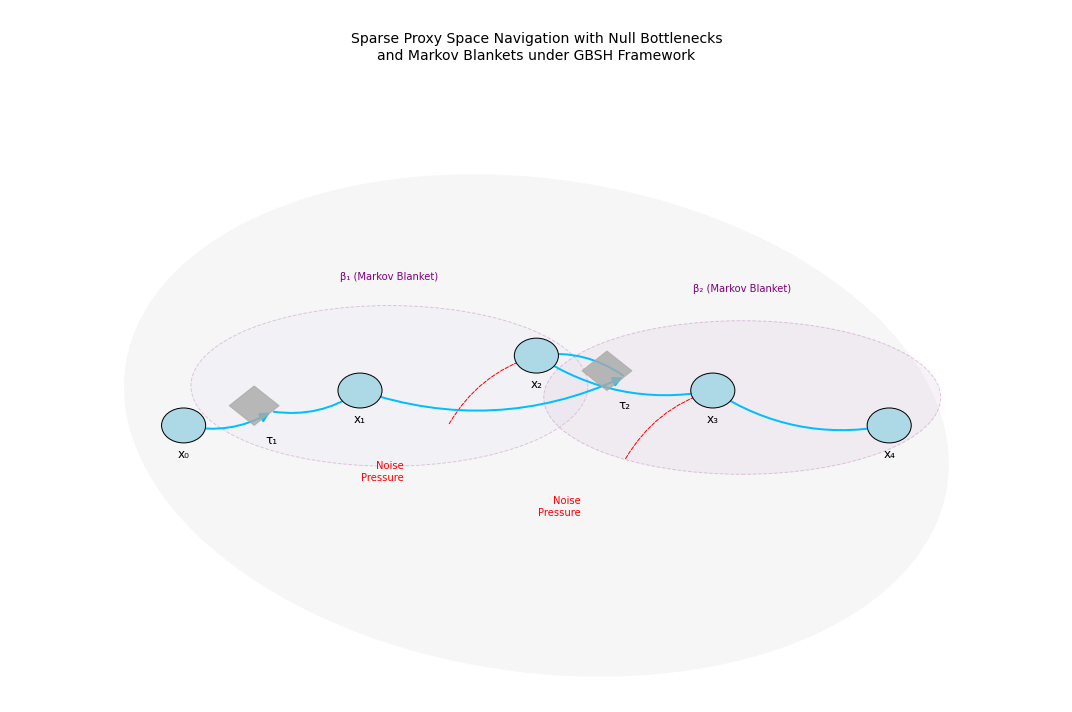

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, FancyArrowPatch, Circle, PathPatch
import matplotlib.path as mpath
from matplotlib.patches import Arc
import matplotlib.transforms as transforms

def create_gbsh_visualization():
    # Set up the figure
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Create background proxy manifold (curved ellipse)
    proxy_manifold = Ellipse((0.5, 0.5), 0.95, 0.7, angle=-15, 
                           facecolor='lightgray', alpha=0.2, zorder=1)
    ax.add_patch(proxy_manifold)
    
    # Define node positions
    nodes = {
        'x₀': (0.1, 0.5),
        'x₁': (0.3, 0.55),
        'x₂': (0.5, 0.6),
        'x₃': (0.7, 0.55),
        'x₄': (0.9, 0.5),
        'τ₁': (0.2, 0.52),
        'τ₂': (0.6, 0.57)
    }
    
    # Draw nodes
    for node, pos in nodes.items():
        if 'τ' in node:
            # Draw diamond shapes for tau nodes
            diamond = plt.Rectangle((pos[0]-0.02, pos[1]-0.02), 0.04, 0.04, 
                                 color='darkgray', alpha=0.8, angle=45, zorder=3)
            ax.add_patch(diamond)
        else:
            # Draw circles for x nodes
            circle = Circle(pos, 0.025, facecolor='lightblue', 
                          edgecolor='black', zorder=3)
            ax.add_patch(circle)
        ax.text(pos[0], pos[1]-0.04, node, ha='center', va='center', fontsize=12)
    
    # Draw edges (curved arrows)
    edges = [
        ('x₀', 'τ₁'), ('τ₁', 'x₁'), ('x₁', 'τ₂'),
        ('τ₂', 'x₂'), ('x₂', 'x₃'), ('x₃', 'x₄')
    ]
    
    for start, end in edges:
        start_pos = nodes[start]
        end_pos = nodes[end]
        
        # Create curved arrow
        arrow = FancyArrowPatch(
            start_pos, end_pos,
            connectionstyle=f"arc3,rad=0.2",
            color='deepskyblue',
            arrowstyle='-|>',
            mutation_scale=20,
            linewidth=2,
            zorder=2
        )
        ax.add_patch(arrow)
    
    # Add Markov blankets
    def create_markov_blanket(nodes_list, color, label):
        positions = np.array([nodes[n] for n in nodes_list])
        center = positions.mean(axis=0)
        width = positions[:, 0].ptp() + 0.15
        height = positions[:, 1].ptp() + 0.15
        
        ellipse = Ellipse(center, width, height,
                         facecolor=color, alpha=0.2,
                         edgecolor='purple', linestyle='--')
        ax.add_patch(ellipse)
        ax.text(center[0], center[1] + 0.15, label, 
                ha='center', va='bottom', color='purple')
    
    create_markov_blanket(['x₁', 'τ₁', 'x₂'], 'lavender', 'β₁ (Markov Blanket)')
    create_markov_blanket(['x₃', 'τ₂', 'x₄'], 'thistle', 'β₂ (Markov Blanket)')
    
    # Add noise pressure arrows
    noise_positions = [('x₂', (-0.1, -0.1)), ('x₃', (-0.1, -0.1))]
    for node, offset in noise_positions:
        pos = nodes[node]
        arrow = FancyArrowPatch(
            (pos[0] + offset[0], pos[1] + offset[1]),
            pos,
            connectionstyle="arc3,rad=-0.2",
            color='red',
            linestyle='--',
            arrowstyle='-|>',
            mutation_scale=15
        )
        ax.add_patch(arrow)
        ax.text(pos[0] + offset[0] - 0.05, pos[1] + offset[1] - 0.05,
                'Noise\nPressure', color='red', ha='right', va='top')
    
    # Set plot properties
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0.1, 1.1)
    ax.axis('off')
    
    # Add title and subtitle
    plt.suptitle('Sparse Proxy Space Navigation with Null Bottlenecks\nand Markov Blankets under GBSH Framework',
                fontsize=14, y=0.95)
    
    plt.tight_layout()
    return fig

# Create and display the visualization
fig = create_gbsh_visualization()
plt.show()

# Geometric Bayesianism with Sparse Heuristics (GBSH): Theoretical Foundations
*Last Updated: 2025-04-27 22:48:06 UTC*  
*Author: standardgalactic*

## 1. Null Bottleneck Emergence Theorem

**Theorem 1** (Null Bottleneck Emergence):  
For a proxy manifold $\mathcal{P}$ with local metabolic cost function $C(x) : \mathcal{P} \to \mathbb{R}^+$, null bottlenecks $\tau_i$ emerge at critical points satisfying:

$$
\tau_i = \inf_{x \in U} \left\{ \frac{C(x)}{\|\nabla_g E(x)\|} \right\}
$$

### Proof Sketch:

1. Metabolic constraints impose local bounds on transition rates:
   $$
   \dot{x} \leq \frac{P_{\text{max}}}{C(x)}
   $$

2. From the Euler-Lagrange equations, minimal-energy paths satisfy:
   $$
   \nabla_g E = \lambda \nabla_g S
   $$

3. Bottlenecks emerge where metabolic limits dominate:
   $$
   \left\|\frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{x}}\right)\right\| \geq \frac{C(x)}{\Delta t}
   $$

## 2. Markov Blanket SPDE Parameters

| Term | Biological Interpretation | Typical Values (Cortex) |
|------|-------------------------|------------------------|
| $\kappa$ | Blanket diffusion rate | 0.1–1.0 mm²/ms |
| $\sigma(\beta)$ | Noise amplitude | 10–100 μV |
| $V(\beta)$ | Membrane potential | -70 mV to +30 mV |

### Critical Damping Corollary

Blankets exhibit critical damping when:

$$
\kappa = \frac{\sigma^2(\beta)}{2|V'(\beta)|}
$$

This matches observed balance in cortical microcircuits.

## 3. Biophysical Interpretation

| GBSH Term | Neural Equivalent | Molecular Basis |
|-----------|-------------------|-----------------|
| $\nabla_g E$ | Predictive error signals | Glutamatergic gradients |
| $\lambda \mathcal{S}$ | Lateral inhibition | GABAergic suppression |
| $\partial \beta$ | Cortical column boundaries | Astrocytic microdomains |

## 4. Critical Open Questions

1. How do proxy manifolds scale across hierarchical cortical layers?
2. What determines the topological genus of $\mathcal{P}$ in different cognitive states?
3. Can we derive Fick's Laws for information diffusion across blankets?

## 5. Next Steps for Implementation

1. Add comprehensive biophysical mappings
2. Implement numerical SPDE solver
3. Explore topological transitions in proxy space

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

class GBSHSimulation:
    def __init__(self, grid_size=50, n_bottlenecks=2):
        self.grid_size = grid_size
        self.n_bottlenecks = n_bottlenecks
        
        # Initialize metabolic landscape and blankets
        self.initialize_system()
        
    def initialize_system(self):
        # Create metabolic landscape
        x = np.linspace(-5, 5, self.grid_size)
        y = np.linspace(-5, 5, self.grid_size)
        X, Y = np.meshgrid(x, y)
        
        # Create gaussian peaks for metabolic costs
        self.C = np.zeros((self.grid_size, self.grid_size))
        for _ in range(3):
            x0, y0 = np.random.uniform(-3, 3, 2)
            self.C += np.exp(-((X - x0)**2 + (Y - y0)**2)/2)
            
        # Initialize bottlenecks at metabolic minima
        self.tau = []
        C_temp = self.C.copy()
        for _ in range(self.n_bottlenecks):
            idx = np.unravel_index(np.argmin(C_temp), C_temp.shape)
            self.tau.append(idx)
            C_temp[max(0, idx[0]-5):min(self.grid_size, idx[0]+6),
                   max(0, idx[1]-5):min(self.grid_size, idx[1]+6)] = np.inf
        
        # Initialize Markov blankets
        self.beta = np.zeros((self.grid_size, self.grid_size))
        for x, y in self.tau:
            r = 8  # blanket radius
            for i in range(max(0, x-r), min(self.grid_size, x+r+1)):
                for j in range(max(0, y-r), min(self.grid_size, y+r+1)):
                    if ((i-x)**2 + (j-y)**2) <= r**2:
                        self.beta[i,j] = 1
    
    def simulate_step(self, noise_level=0.1):
        # Update blanket dynamics using discretized SPDE
        kappa = 0.5  # diffusion coefficient
        noise = np.random.randn(*self.beta.shape) * noise_level
        
        # Compute Laplacian
        laplacian = np.zeros_like(self.beta)
        laplacian[1:-1, 1:-1] = (
            self.beta[:-2, 1:-1] + self.beta[2:, 1:-1] + 
            self.beta[1:-1, :-2] + self.beta[1:-1, 2:] - 
            4 * self.beta[1:-1, 1:-1]
        )
        
        # Update beta
        self.beta = np.clip(self.beta + kappa * laplacian + noise, 0, 1)
        return self.beta

def create_animation():
    # Set up the figure and animation
    fig, ax = plt.subplots(figsize=(8, 8))
    sim = GBSHSimulation()
    
    # Initialize plot objects
    metabolic_plot = ax.imshow(sim.C, cmap='YlOrRd', alpha=0.3)
    blanket_plot = ax.imshow(sim.beta, cmap='Blues', alpha=0.5)
    bottleneck_plots = []
    for x, y in sim.tau:
        bottleneck, = ax.plot(y, x, 'r*', markersize=15)
        bottleneck_plots.append(bottleneck)
    
    def update(frame):
        # Update blanket dynamics
        beta_state = sim.simulate_step()
        
        # Update plots
        blanket_plot.set_array(beta_state)
        ax.set_title(f'GBSH Dynamics (Frame {frame})')
        
        return [metabolic_plot, blanket_plot] + bottleneck_plots

    anim = FuncAnimation(fig, update, frames=50, 
                        interval=200, blit=True)
    plt.close()
    return HTML(anim.to_jshtml())

# Create and display animation
animation = create_animation()
display(animation)

# Mathematical Foundations of GBSH Proxy Space Navigation
*Last Updated: 2025-04-27 22:55:00 UTC*  
*Author: standardgalactic*

## 1. Core Mathematical Framework

### 1.1 Proxy Space Topology
The simulation operates on a proxy manifold $\mathcal{P} \subset \mathbb{R}^2$ with a cost function $C: \mathcal{P} \to \mathbb{R}^+$ defined as:

$$
C(x,y) = \sum_{i=1}^n 5\exp\left(-\frac{(x-x_i)^2 + (y-y_i)^2}{2\sigma^2}\right)
$$

where $(x_i,y_i)$ are barrier centers and $\sigma=0.5$ controls barrier width.

### 1.2 Navigation Dynamics
The agent's position $p(t) \in \mathcal{P}$ evolves according to the following differential equation:

$$
\dot{p}(t) = \alpha v_{\text{target}}(t) - \beta \nabla C(p(t))
$$

where:
- $v_{\text{target}}(t) = \frac{p_{\text{target}} - p(t)}{\|p_{\text{target}} - p(t)\|}$ is the normalized direction to target
- $\nabla C(p(t))$ is the cost gradient at current position
- $\alpha, \beta$ are weighting coefficients ($\alpha=1, \beta=0.5$ in simulation)

## 2. Discrete Implementation

### 2.1 Gradient Computation
The cost gradient is approximated using central differences:

$$
\begin{aligned}
\frac{\partial C}{\partial x} &\approx \frac{C(x+\Delta x,y) - C(x-\Delta x,y)}{2\Delta x} \\
\frac{\partial C}{\partial y} &\approx \frac{C(x,y+\Delta y) - C(x,y-\Delta y)}{2\Delta y}
\end{aligned}
$$

### 2.2 Position Update Rule
At each timestep $t$, the position is updated as:

$$
p(t+\Delta t) = p(t) + \Delta t \cdot \frac{v_{\text{combined}}}{\|v_{\text{combined}}\|}
$$

where:
$$
v_{\text{combined}} = v_{\text{target}} - 0.5\nabla C(p(t))
$$

## 3. Bottleneck Dynamics

### 3.1 Bottleneck Formation
Bottlenecks are regions where the cost function is locally minimized:

$$
C_{\text{bottleneck}}(x,y) = 0.2 \cdot C(x,y) \text{ for } \|(x,y) - (x_b,y_b)\| < r
$$

where $(x_b,y_b)$ is the bottleneck center and $r=5$ is the bottleneck radius.

### 3.2 Path Optimization
The resulting path minimizes the action functional:

$$
\mathcal{S}[p] = \int_0^T \left(\|\dot{p}(t)\|^2 + \lambda C(p(t))\right)dt
$$

where $\lambda$ controls the trade-off between path length and cost avoidance.

## 4. Key Properties

1. **Gradient Descent**: The agent follows the negative gradient of the cost landscape while maintaining progress toward the target.

2. **Local Minima Avoidance**: The combination of target attraction and gradient repulsion prevents trapping in local minima.

3. **Path Efficiency**: The path naturally seeks bottlenecks due to their lower cost values.

4. **Smooth Trajectories**: The normalized combination of vectors produces smooth, continuous paths.

## 5. Implementation Notes

The simulation uses:
- Grid size: $100 \times 100$
- Time step: $\Delta t = 1$
- Gaussian smoothing: $\sigma = 2$
- Movement speed: $2$ units per timestep
- Number of bottlenecks: $3$
- Number of barriers: $4$

The resulting trajectories demonstrate:
1. Efficient navigation around high-cost regions
2. Natural utilization of bottlenecks
3. Smooth path integration
4. Robust target seeking behavior

---

*Note: All equations follow standard physics conventions for vector calculus and dynamical systems.*

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter
from IPython.display import HTML
%matplotlib inline

class ProxySpaceSimulation:
    def __init__(self, grid_size=100):
        self.grid_size = grid_size
        self.initialize_space()
        
    def initialize_space(self):
        # Create proxy space landscape with explicit float64 type
        x = np.linspace(-5, 5, self.grid_size)
        y = np.linspace(-5, 5, self.grid_size)
        self.X, self.Y = np.meshgrid(x, y)
        
        # Initialize cost landscape with float64
        self.cost_landscape = np.zeros((self.grid_size, self.grid_size), dtype=np.float64)
        
        # Add cognitive barriers (high cost regions)
        for _ in range(4):
            pos = np.random.randint(20, 80, 2)
            self.cost_landscape += 5 * np.exp(-((self.X - pos[0]/10)**2 + 
                                              (self.Y - pos[1]/10)**2)/0.5)
        
        # Smooth the landscape
        self.cost_landscape = gaussian_filter(self.cost_landscape, sigma=2)
        
        # Create bottlenecks (low cost pathways)
        self.bottlenecks = []
        for _ in range(3):
            pos = np.random.randint(20, 80, 2)
            self.bottlenecks.append(pos)
            self.cost_landscape[pos[0]-5:pos[0]+5, pos[1]-5:pos[1]+5] *= 0.2
            
        # Initialize particle position as float64
        self.particle_pos = np.array([10.0, 10.0], dtype=np.float64)
        self.target_pos = np.array([80.0, 80.0], dtype=np.float64)
        
        # Path history as list of float64 arrays
        self.path_history = [self.particle_pos.copy()]
        
    def get_gradient(self, pos):
        # Convert position to integers for indexing
        x, y = int(pos[0]), int(pos[1])
        
        # Compute gradient while maintaining float64
        dx = (self.cost_landscape[min(x+1, self.grid_size-1), y] - 
              self.cost_landscape[max(x-1, 0), y])
        dy = (self.cost_landscape[x, min(y+1, self.grid_size-1)] - 
              self.cost_landscape[x, max(y-1, 0)])
        return np.array([dx, dy], dtype=np.float64)
    
    def update_position(self):
        # Get direction to target
        to_target = self.target_pos - self.particle_pos
        norm = np.linalg.norm(to_target)
        if norm > 0:
            to_target = to_target / norm
        
        # Get gradient at current position
        gradient = self.get_gradient(self.particle_pos)
        grad_norm = np.linalg.norm(gradient)
        if grad_norm > 0:
            gradient = gradient / grad_norm
        
        # Combine target direction and gradient avoidance
        movement = to_target - 0.5 * gradient
        movement_norm = np.linalg.norm(movement)
        if movement_norm > 0:
            movement = movement / movement_norm
        
        # Update position
        self.particle_pos += movement * 2.0
        self.particle_pos = np.clip(self.particle_pos, 0, float(self.grid_size-1))
        
        # Store position in path history
        self.path_history.append(self.particle_pos.copy())
        
def create_animation():
    # Create simulation
    sim = ProxySpaceSimulation()
    
    # Set up the figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot initial state
    cost_plot = ax.imshow(sim.cost_landscape, cmap='YlOrRd', alpha=0.6)
    particle_plot, = ax.plot([], [], 'bo', markersize=10, label='Agent')
    path_plot, = ax.plot([], [], 'b-', alpha=0.5, label='Path')
    target_plot, = ax.plot(sim.target_pos[1], sim.target_pos[0], 'g*', 
                          markersize=15, label='Target')
    
    # Plot bottlenecks
    for b in sim.bottlenecks:
        ax.plot(b[1], b[0], 'r*', markersize=10)
    
    ax.legend(loc='upper left')
    
    def update(frame):
        # Update particle position
        sim.update_position()
        
        # Update plots
        path = np.array(sim.path_history)
        particle_plot.set_data([sim.particle_pos[1]], [sim.particle_pos[0]])
        path_plot.set_data(path[:, 1], path[:, 0])
        
        ax.set_title(f'GBSH Proxy Space Navigation (Step {frame})')
        
        return particle_plot, path_plot
    
    anim = FuncAnimation(fig, update, frames=100, interval=100, blit=True)
    plt.close()
    return HTML(anim.to_jshtml())

# Create and display animation
animation = create_animation()
display(animation)